In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dx = 5
dy = 5

Lx = 100
Ly = 100

class node:
    def __init__(self):
        self.node_pos = None
        self.Cell_size_x = 5
        self.Cell_size_y = 5
        self.grid_face = None
        self.node_type = None 
        self.Gx = None # Location along the x axis
        self.Gy = None # Location along the y axis
        self.edge_color = "blue"

        # self.edge_node_pos = []

In [4]:
mesh = []
for y in range(int(Ly/dy)):
    mesh.append([node() for x in range(int(Lx/dx))])
# Basically the shape is (Lx / dx) x (Ly x dx)

mesh = np.array(mesh)
mesh.shape

(20, 20)

In [5]:
x_val = 0
y_val = 0

# the origin of the x and y axis is on the bottom left
for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        cell.Gx = x_val
        cell.Gy = y_val

        x_val += cell.Cell_size_x
    x_val = 0
    y_val += cell.Cell_size_y

In [199]:
x, y = 4, 0
mesh[x][y].Gx, mesh[x][y].Gy

(0, 20)

In [6]:
plot_size_x = 0
plot_size_y = 0

run_x = True

for y in range(mesh.shape[0]):
    if run_x == True:
        for x in range(mesh.shape[1]):
            plot_size_x += mesh[y][x].Cell_size_x
    run_x = False

    plot_size_y += mesh[y][x].Cell_size_y

In [201]:
plot_size_x, plot_size_y

(45, 60)

In [24]:
def stretch_one_point(arr, index, percent):
    arr = arr.copy()
    total = sum(arr)

    # Stretch the chosen point
    increase = arr[index] * (percent / 100.0)
    arr[index] += increase

    # Distribute decrease across other elements
    decrease = increase / (len(arr) - 1)
    for i in range(len(arr)):
        if i != index:
            arr[i] -= decrease

    # Ensure sum is preserved (floating-point safe)
    diff = total - sum(arr)
    arr[index] += diff

    return arr


# Example usage
x_axis = [5, 5, 5, 5, 5]
result = stretch_one_point(x_axis, index=2, percent=50)  # Stretch 3rd element by 10%
print(result)
print("Sum:", sum(result))

[4.375, 4.375, 7.5, 4.375, 4.375]
Sum: 25.0


In [21]:
sum_x = x_axis.sum()
sum_x

250.0

In [ ]:
degrade = 0.1

In [ ]:
def strech(x, y):
    

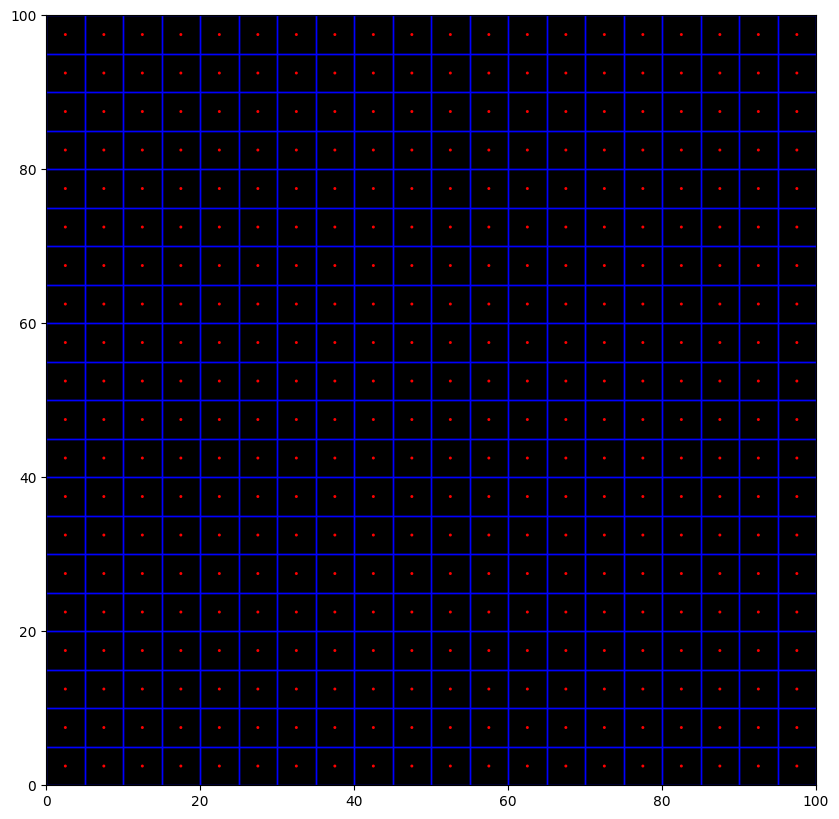

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))  # width=10 inches, height=10 inches

canvas = np.ones((plot_size_y, plot_size_x))
ax.imshow(canvas, origin='lower', cmap='gray',
          extent=[0, plot_size_x, 0, plot_size_x])

for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]

        # Draw circle at cell center
        circle = plt.Circle((cell.Gx + dx/2, cell.Gy + dy/2), 0.1, color='red', fill=False)
        ax.add_patch(circle)

        # Draw rectangle for each cell
        rect = plt.Rectangle((cell.Gx, cell.Gy), dx, dy, linewidth=1, edgecolor=cell.edge_color, facecolor='none')
        ax.add_patch(rect)

plt.show()